# Estatística - P4 - Lista 10

## Ex. 1)

Definindo a tabela ($x, y$)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
table = pd.DataFrame({'x': [10, 13, 5, 7, 20],
                     'y': [4, 3, 6, 5, 2]})

In [3]:
table.head()

,x,y
0,10,4
1,13,3
2,5,6
3,7,5
4,20,2


### a) Faça o diagrama de dispersão dos dados.

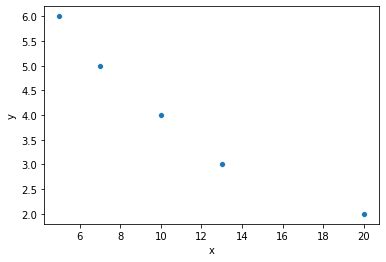

In [4]:
sns.scatterplot(table['x'], table['y'])

### b) Encontre a reta de MQ, supondo a relação $E(y_i|x_i) = \hat{y}_i = \hat{\alpha}+\hat{\beta}x_i$

A reta de $\hat{y}_i$ é tal que os valores de $\hat{\beta}$ e $\hat{\alpha}$ são, respectivamente:
$$\hat{\beta} = \dfrac{n\bar{x}\bar{y}-\sum^n_{i=1}x_iy_i}{n\bar{x}^2-\sum^n_{i=1}x_i^2}$$
e
$$\hat{\alpha} = \bar{y} - \hat{\beta}\bar{x}$$

NameError: name 'table' is not defined

In [5]:
x_mean = table['x'].mean()
y_mean = table['y'].mean()

n = table.shape[0]

xy = (table['x']*table['y']).sum()
x2 = (table['x']**2).sum()

In [6]:
beta_ch = ((n*x_mean*y_mean)-xy)/(n*x_mean**2-x2)
alpha_ch = y_mean - beta_ch*x_mean
beta_ch, alpha_ch

(-0.2608695652173913, 6.869565217391305)

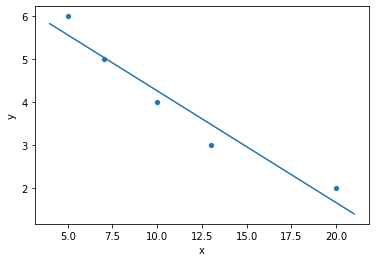

In [7]:
X = np.linspace(table['x'].min()-1, table['x'].max()+1)
y_ch = alpha_ch + beta_ch*X

sns.scatterplot(table['x'], table['y'])
sns.lineplot(X, y_ch)

### c) Qual o significado do coeficiente angular nesse caso? E do coeficiente linear?

- O coeficiente angular ($\hat{\beta}$) representa, aqui, o acréscimo (ou decréscimo) esperado do valor esperado de $\hat{y}$ quando aumenta-se uma unidade em $x$, ou seja, o tanto que é acrescentado ao valor do aluguel ao aumentar-se uma unidade de idade
- O coeficiente linear ($\hat{\alpha}$) representa o valor esperado do valor de $\hat{y}$ quando $x=0$, ou seja, qual é o valor do aluguel quando a casa é nova

### d) Construa a Tabela ANOVA (Análise de Variância) para Regressão.

A tabela ANOVA para regressão é dada por:

| **Fonte de variação (FV)** | **Graus de liberdade (GL)** | **Soma quadrática (SQ)** | **Quadrado médio (QM)** | **F** |
| :- | :-: | :-: | :-: | :-: |
| Regressão | $1$ | $SQReg = \sum_{i=1}^n(\hat{y}_i-\bar{y})^2$ | $QMReg = SQReg$ | $F_{obs} = \dfrac{QMReg}{QMRes}$ |
| Resíduo | $n-2$ | $SQRes = \sum_{i=1}^n(y_i-\hat{y}_i)^2$ | $QMRes = \dfrac{SQRes}{n-2}$ |  |
| Total | $n-1$ | $SQTot = \sum_{i=1}^n(y_i-\bar{y})^2$ | $QMTot = \dfrac{SQTot}{n-1}$ |  |

In [8]:
y = table['y']
x = table['x']

y_ch = alpha_ch + beta_ch*x
y_ch, table['y']

(0    4.260870
 1    3.478261
 2    5.565217
 3    5.043478
 4    1.652174
 Name: x, dtype: float64,
 0    4
 1    3
 2    6
 3    5
 4    2
 Name: y, dtype: int64)

In [9]:
SQReg = ((y_ch-y_mean)**2).sum()
SQRes = ((y-y_ch)**2).sum()
SQTot = ((y-y_mean)**2).sum()

QMReg = SQReg
QMRes = SQRes/(n-2)
QMTot = SQTot/(n-1)

Fobs = QMReg/QMRes

In [10]:
list_reg = pd.DataFrame({'SQ': [SQReg, SQRes, SQTot],
                         'QM': [QMReg, QMRes, QMTot],
                         'F': [Fobs, Fobs, Fobs]}, index = ['Regressão', 'Resíduo', 'Total'])
list_reg.round(2)

,SQ,QM,F
Regressão,9.39,9.39,46.29
Resíduo,0.61,0.20,46.29
Total,10.00,2.50,46.29


Logo, a tabela ANOVA para regressão fica:

| **Fonte de variação (FV)** | **Graus de liberdade (GL)** | **Soma quadrática (SQ)** | **Quadrado médio (QM)** | **F** |
| :- | :-: | :-: | :-: | :-: |
| Regressão | $1$ | $9.39$ | $9.39$ | $46.29$ |
| Resíduo | $3$ | $0.61$ | $0.20$ |  |
| Total | $4$ | $10.00$ | $2.50$ |  |

### e) Quais as estimativas de $S$ e $S_e$ ? Você acha que a redução nos resíduos foi grande?

Os valores estimados para $S$ e $S_e$ são, respectivamente, $0.20$ e $2.50$. É possível notar que $SQRes$ é equivalente a $0.61$, sendo $\frac{SQRes}{SQTot} = 0.061$, ou seja, os dados são explicados apenas em um nível de $6.10\%$ através do modelo 1, o qual desconsidera uma relação linear entre os dados de $x$ e $y$. Portanto, a redução de $S$ para $S_e$ foi significativa.

### (f) Qual o valor de $R$? Interprete esse número.

O valor de $R^2$ é dado pelo fator $SQReg/SQTot$, ou seja:

In [11]:
R2 = SQReg/SQTot
round(R2*100, 2)

93.91

Logo, o valor de $R$ é de $93.91\%$. Este valor significa que o valor do aluguel das casa são descritas em $93.91\%$ através da idade que elas possuem.

### g) Faça o teste de hipóteses $H_0:\, \beta=0$ versus $H_1:\,\beta\ne0$ e interprete o resultado obtido.

Para testar a hipótese, utiliza-se o estimador para $\beta$ dado por 
$$T = \dfrac{\hat{\beta}-\beta}{\sqrt{S_e^2\frac{1}{\sum^n_{i=1}(x_i-\bar{x})^2}}} \tilde{} t_{n-2}$$

Ainda, a região crítica será $RC = \{T\in\mathbb{R} | T<-t_c$ ou $T>t_c\}$, onde $t_c = t_{\frac{\alpha}{2}, n-2}$. Para $n-2 = 3$ e $\alpha = 0.05$:

In [12]:
from student import *

student = import_student_table()

In [13]:
t_c = find_t(student, 1-0.05, 4)
round(t_c,2)

3.18

Logo, a RC será $RC = \{T\in\mathbb{R} | T<-3.18$ ou $T>3.18\}$. A estatística observada sob $H_0$ ($\beta = 0$) será $t_0 = \dfrac{\hat{\beta}}{\sqrt{S_e^2\frac{1}{\sum^n_{i=1}(x_i-\bar{x})^2}}}$

In [14]:
t_0 = beta_ch/np.sqrt(QMRes**2/((x-x_mean)**2).sum())
round(t_0, 2)

-15.1

Logo, $t_0\in RC$, e $H_0$ é rejeitado, de forma que existe uma relação linear entre entre o valor de aluguel e a idade das casas.

## Ex 3)

Iniciando a tabela:

In [15]:
table = pd.DataFrame({'Tempo': [10.8, 14.4, 19.6, 18.0, 8.4, 15.2, 11.0, 13.3, 23.1],
                      'Volume': [20.39, 24.92, 34.84, 31.72, 13.59, 30.87, 17.84, 23.22, 39.65]
                     })
table.head()

,Tempo,Volume
0,10.8,20.39
1,14.4,24.92
2,19.6,34.84
3,18.0,31.72
4,8.4,13.59


### a) Estime a reta de regressão do tempo de operação em função do volume.

In [16]:
def alpha_beta(data, args):
    n = data.shape[0]
    
    x = args[0]
    y = args[1]
    
    x_mean = data[x].mean()
    y_mean = data[y].mean()

    xy = (table[x]*table[y]).sum()
    x2 = (table[x]**2).sum()
    
    beta_ch = ((n*x_mean*y_mean)-xy)/(n*x_mean**2-x2)
    alpha_ch = y_mean - beta_ch*x_mean
    return alpha_ch, beta_ch

In [17]:
alpha_ch, beta_ch = alpha_beta(table, ['Volume', 'Tempo'])
print(round(alpha_ch, 2), round(beta_ch,2))

0.66 0.54


In [18]:
tempo = table['Tempo']
vol = table['Volume']

y_ch = alpha_ch + beta_ch*vol

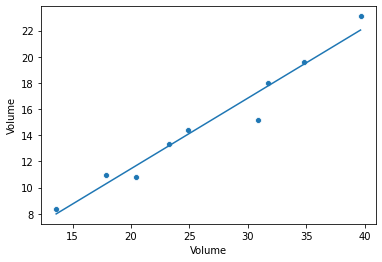

In [19]:
sns.scatterplot(vol, tempo)
sns.lineplot(vol, y_ch)

Logo, os valores de $\hat{\alpha}$ e $\hat{\beta}$ são, respectivamente, $-0.11$ e $1.78$.

### b) Construa a tabela ANOVA para o modelo.

In [20]:
def ANOVA_regr(data, args):
    n = data.shape[0]
    x = args[0]
    y = args[1]
    
    x_mean = data[x].mean()
    y_mean = data[y].mean()
    
    alpha_ch, beta_ch = alpha_beta(table, args)
    y_ch = alpha_ch + data[x]*beta_ch
    
    SQTot = ((data[y]-y_mean)**2).sum()
    SQRes = ((data[y]-y_ch)**2).sum()
    SQReg = ((y_ch-y_mean)**2).sum()
    
    QMReg = SQReg
    QMRes = SQRes/(n-2)
    QMTot = SQTot/(n-1)
    
    Fobs = QMReg/QMRes
    
    ANOVA_regr = pd.DataFrame({'n': [1, n-2, n-1],
                               'SQ': [SQReg, SQRes, SQTot],
                              'QM': [QMReg, QMRes, QMTot],
                              'F': [Fobs, Fobs, Fobs]
                             }, index = ['Regressão', 'Resíduo', 'Total'])
    
    return ANOVA_regr

In [21]:
ANOVA_regr(table, ['Volume', 'Tempo']).round(2)

,n,SQ,QM,F
Regressão,1,168.94,168.94,165.13
Resíduo,7,7.16,1.02,165.13
Total,8,176.10,22.01,165.13


### c) Qual o valor de $S^2_e$? Este valor é pequeno quando comparado com $S^2$?

O valor de $S_e^2$ é $1.02$ ($QMRes$), e o de $S^2$ é $22.01$ ($QMTot$). O valor de $S^2$ é evidente bem maior que o de $S^2_e$, indicando que o provavelmente a descrição do problema ganha mais informações quando considerado o modelo 2.

### d) Qual o valor de $R^2$? Interprete esse número.

In [22]:
anova_table = ANOVA_regr(table, ['Volume', 'Tempo']).round(2)
SQReg = anova_table["SQ"].loc["Regressão"]
SQTot = anova_table["SQ"].loc["Total"]

In [23]:
R2 = SQReg/SQTot
round(R2, 2)

0.96

Assim, o valor de $R^2$ é $0.96$. Ou seja, $96.00\%$ da variabilidade total dos dados são explicados através do modelo linear.

### e) Construa o $IC(\beta; \,95\%)$ e o $IC(\alpha;\, 90\%)$

Os intervalos de confiança para $\alpha$ e $\beta$ com uma significância de $\gamma$ são dados por
$$IC(\alpha;(1-\gamma)100\%) = \hat{\alpha} \pm t_{\frac{\gamma}{2},(n-2)}S_e\sqrt{\dfrac{\sum^n_{i=1}x^2_i}{n\sum^n_{i=1}(x_i-\bar{x})^2}}$$
e
$$IC(\beta;(1-\gamma)100\%) = \hat{\beta} \pm t_{\frac{\gamma}{2},(n-2)}S_e\sqrt{\dfrac{1}{\sum^n_{i=1}(x_i-\bar{x})^2}}$$
respectivamente. 

#### **Para o caso de $\beta$**:
Para um $\gamma = 0.05$, $n-2 = 7$:

In [24]:
t = find_t(student, 1-0.05, 8)
Se = anova_table['QM'].loc['Resíduo']

In [63]:
def IC_regr(data, args, t, Se, const='beta', x_ext = None):
    x = data[args[0]]
    y = data[args[1]]
    
    x_mean = x.mean()
    n = len(x)
    
    alpha_ch, beta_ch = alpha_beta(table, args)
    
    if const == 'beta':
        c = beta_ch
        C = t*Se*np.sqrt(1/((x-x_mean)**2).sum())
    if const == 'alpha':
        c = alpha_ch
        x2 = (x**2).sum()
        C = t*Se*np.sqrt(x2/(((x-x_mean)**2).sum()*n))
    if const == 'IP':
        c = alpha_ch + beta_ch*x_ext
        xdiff = ((x-x_mean)**2).sum()
        C = t*Se*np.sqrt(1+(1/n)+((x_ext-x_mean)**2/xdiff))
        return c, [c-C, c+C]
    
    return c-C, c+C

In [26]:
IC_regr(table, ['Volume', 'Tempo'], t, Se)

(0.4392152634099808, 0.6394014550185037)

#### **Para o caso de $\alpha$**:

Para um $\gamma = 0.1$, $n-2 = 7$:

In [27]:
t = find_t(student, 1-0.1, 8)
Se = anova_table['QM'].loc['Resíduo']

In [28]:
IC_regr(table, ['Volume', 'Tempo'], t, Se, const = 'alpha')

(-1.5459217556350686, 2.8708876516030712)

### f) Usando a estatística $F$, teste as hipóteses $H_0:\, \beta = 0$ versus $H_1:\, \beta\ne 0$ e interprete o resultado obtido. Você acha que conhecer o volume do pacote ajuda a prever o tempo de empacotamento?

O estimador para $\beta$ é
$$T = \dfrac{\hat{\beta}-\beta}{\sqrt{S_e^2\frac{1}{\sum^n_{i=1}(x_i-\bar{x})^2}}} \tilde{} t_{n-2}$$
onde, sobre $H_0$, a estatística observada é
$$t_0 = \dfrac{\hat{\beta}}{\sqrt{S_e^2\frac{1}{\sum^n_{i=1}(x_i-\bar{x})^2}}} \tilde{} t_{n-2}$$

A região crítica pode ser escrita pela distribuição $F$, onde
$$RC = \{F\in\mathbb{R} | F>f_c\}$$
sendo $f_c = F_{1, n-2}$, que pela tabela, da distribuição $F$, com uma significância de $5.00\%$, $f_c=F_{1, 7} = 5.59$, ou seja, $RC = \{F\in\mathbb{R} | F>5.59\}$. 

Como o valor de $F_{obs}$ foi de $165.13$, então $H_0$ é rejeitado, ou seja, $\beta\ne0$.

### g) Qual o tempo médio esperado para empacotar um volume com $30\,dm^3$? Ache a estimativa pontual e o intervalo de confiança correspondente.

Como se trata de uma medida exterior ao conjunto utilizado para se fazer a regressão, o intervalo a ser usado é o **intervalo de predição**, que é dado pela relação
$$IP(y_f;\, (1-\gamma)100\%) = \hat{y}_f \pm t_{\frac{\gamma}{2},(n-2)}S_e\sqrt{1+ \dfrac{1}{n} + \dfrac{(x_i-\bar{x})^2}{\sum^n_{i=1}(x_i-\bar{x})^2}}$$

In [29]:
y_f = alpha_ch+beta_ch*30
round(y_f, 2)

16.84

In [30]:
t = find_t(student, 1-0.05, 8)
Se = anova_table['QM'].loc['Resíduo']

In [31]:
IC_regr(table, ['Volume', 'Tempo'], t, Se, const = 'IP', x_ext = 30)

(14.272660613329665, 19.410806835492878)

## Ex 5.

Escrevendo os dados apresentados no enunciado:

In [33]:
table = pd.DataFrame({'Meses': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                     'Erros': [30, 28, 24, 20, 18, 14, 13, 10, 7, 6]})
table

,Meses,Erros
0,1,30
1,2,28
2,3,24
3,4,20
4,5,18
5,6,14
6,7,13
7,8,10
8,9,7
9,10,6


### a) Represente graficamente esse conjunto de dados.

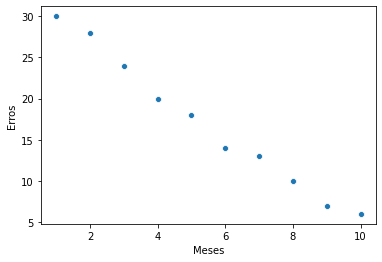

In [34]:
sns.scatterplot(table['Meses'], table['Erros'])

### b) Assumindo que um modelo de regressão linear é adequado, determine os coeficientes da equação pelo método dos mínimos quadrados

In [35]:
alpha_ch, beta_ch = alpha_beta(table, ['Meses', 'Erros'])
round(alpha_ch, 2), round(beta_ch, 2)

(32.27, -2.78)

### c) Represente a reta de regressão no gráfico feito anteriormente.

In [36]:
y_ch = alpha_ch + beta_ch*table['Meses']

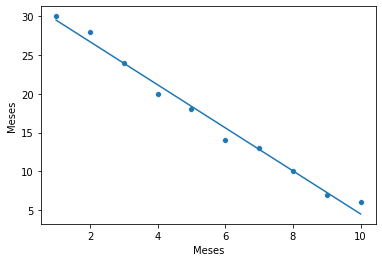

In [37]:
sns.scatterplot(table['Meses'], table['Erros'])
sns.lineplot(table['Meses'], y_ch)

### d) Qual o número esperado de erros para um digitador com 5 meses de experiência?

In [40]:
y_f = alpha_ch + beta_ch*5
round(y_f, 2)

18.39

## Ex. 7

Do enunciado, a tabela ANOVA fornecida é dada por:

| **Fonte de variação (FV)** | **Graus de liberdade (GL)** | **Soma quadrática (SQ)** | **Quadrado médio (QM)** | **F** |
| :- | :-: | :-: | :-: | :-: |
| Regressão | - | $1209$ | $-$ | $-$ |
| Resíduo | - | $1209$ | $-$ |  |
| Total | $11$ | $1766$ | $-$ |  |

Assim:

- $GL(Total) = n-1 = 11$, e portanto $n = 12$
- $QMReg = SQReg = 1209$
- $QMRes = \dfrac{SQRes}{n-2} = 120.9$
- $QMTot = \dfrac{SQTot}{n-1} = 160.55$
- $F_{obs} = \dfrac{QMReg}{QMRes} = 10$

In [42]:
QMRes = 1209/(12-2)
QMRes

120.9

In [43]:
QMTot = 1766/(12-1)
QMTot

160.54545454545453

In [44]:
F =  1209/120.9
F

10.0

Logo, a tabela ANOVA preenchida fica:

| **Fonte de variação (FV)** | **Graus de liberdade (GL)** | **Soma quadrática (SQ)** | **Quadrado médio (QM)** | **F** |
| :- | :-: | :-: | :-: | :-: |
| Regressão | $1$ | $1209$ | $1209$ | $10$ |
| Resíduo | $10$ | $1209$ | $120.9$ |  |
| Total | $11$ | $1766$ | $160.55$ |  |

## Ex. 9

Inserindo os valores apresentados no enunciado:

In [46]:
X = [0.5, 0.5, 1.0, 1.0, 1.0, 4.0, 4.0, 4.0, 4.5, 4.5, 4.5, 5.0, 5.0, 5.0, 5.5, 6.0, 6.0]
Y = [163, 182, 978, 466, 549, 495, 723, 681, 619, 1049, 1033, 890, 1522, 1194, 987, 764, 1373]

table = pd.DataFrame({'Idade': X,
                     'Custo': Y})
table.head()

,Idade,Custo
0,0.5,163
1,0.5,182
2,1.0,978
3,1.0,466
4,1.0,549


### a) Ajuste o modelo $\hat{y}_i= \beta_0 + \beta_1\hat{x}_i$ e teste a hipótese de interesse para o nível $\alpha = 0.10$.

In [47]:
beta_0, beta_1 = alpha_beta(table, ['Idade', 'Custo'])
beta_0, beta_1

(323.6222737819027, 131.7164733178654)

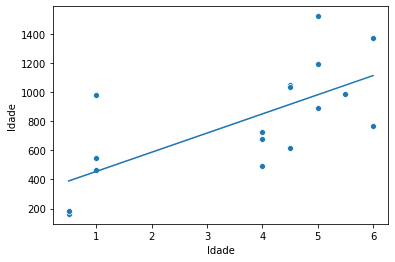

In [48]:
sns.scatterplot(table['Idade'], table['Custo'])
sns.lineplot(table['Idade'], beta_0+beta_1*table['Idade'])

Testando as hipóteses $H_0:\,\beta_1 = 0$ e $H_1:\,\beta_1\ne0$, é possível cosntruir a região crítica dada por $RC = \{T\in\mathbb{R} | T<-t_c$ ou $T>t_c\}$, onde $t_c = t_{\frac{\alpha}{2}, n-2}$. Para $n-2=15$ e $\alpha=0.1$:

In [52]:
n = table.shape[0]

t = find_t(student, 1-0.1, 18)
t

1.74

Logo, $RC = \{T\in\mathbb{R} | T<-1.74$ ou $T>1.74\}$. A estatística a ser calculada, sob $H_0$, é dada por 
$$t_0 = \dfrac{\hat{\beta}}{\sqrt{S_e^2\frac{1}{\sum^n_{i=1}(x_i-\bar{x})^2}}}$$
onde, para obter $S_e^2$, se faz necessário calcular a tabela ANOVA.

In [55]:
anova_table = ANOVA_regr(table, ['Idade', 'Custo'])
anova_table.round(2)

,n,SQ,QM,F
Regressão,1,1099634.98,1099634.98,13.68
Resíduo,15,1205407.02,80360.47,13.68
Total,16,2305042.00,144065.12,13.68


In [69]:
Se2 = anova_table['QM'].loc['Resíduo']
t_0 = (beta_1)/(np.sqrt(Se2*(1/((table['Idade']-table['Idade'].mean())**2).sum())))
round(t_0, 2)

3.7

Logo, como $t_0 \in RC$, então $H_0$ é rejeitado, ou seja, $\beta\ne0$.

### b) Determine uma “previsão” para o custo de manutenção para tratores com 5 anos de idade e obtenha um intervalo de confiança com $90\%$ de confiança.

In [64]:
IC_regr(table, ['Idade', 'Custo'], t, np.sqrt(Se2), const='IP', x_ext = 5)

(982.2046403712297, [467.7754027036103, 1496.6338780388492])

Logo, a previsão de custo é de aproximadamente $982.20$, sendo o intervalo de predição
$$IP(y_f, 90\%) = (467.78, 1496.63)$$

### c) Teste as hipóteses $H_0:\, \beta_0 = 300$ versus $H_1 :\, \beta_0 > 300$, para o nível $\alpha = 0.05$.

In [68]:
t = find_t(student, 1-0.05, 18, interval = 'unilateral')
t

1.74

Logo, aqui a RC será $RC = \{T\in\mathbb{R} | T>1.74\}$

In [67]:
x2 = (table['Idade']**2).sum()
t_0 = (beta_0-300)/(np.sqrt(Se2*(x2/(((table['Idade']-table['Idade'].mean())**2).sum()*n))))
t_0

0.1607625272856998

Logo, $t_0\notin RC$, e portanto a hipótese nula não é rejeitada, ou seja, $\beta_0 = 300$.

## Ex. 11